In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

/home/kleyton/codenation/enem-2/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('train.csv', index_col='NU_INSCRICAO')
test_data = pd.read_csv('test.csv', index_col='NU_INSCRICAO')

Usando somente colunas presentes nos dados de teste:

In [4]:
train_cols = test_data.columns.to_list() + ['NU_NOTA_MT']

df = df[train_cols]
df.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,...,520.0,D,D,C,A,A,C,H,A,399.4
2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,...,580.0,A,A,B,A,A,A,NaN,A,459.8
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,...,NaN,H,E,E,C,B,C,F,D,NaN
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,...,NaN,E,D,C,A,A,B,F,A,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13730 entries, ed50e8aaa58e7a806c337585efee9ca41f1eb1ad to 0af8939c470a600b30bdaa80375ee0db848b0e35
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO_UF_RESIDENCIA        13730 non-null  int64  
 1   SG_UF_RESIDENCIA        13730 non-null  object 
 2   NU_IDADE                13730 non-null  int64  
 3   TP_SEXO                 13730 non-null  object 
 4   TP_COR_RACA             13730 non-null  int64  
 5   TP_NACIONALIDADE        13730 non-null  int64  
 6   TP_ST_CONCLUSAO         13730 non-null  int64  
 7   TP_ANO_CONCLUIU         13730 non-null  int64  
 8   TP_ESCOLA               13730 non-null  int64  
 9   TP_ENSINO               4282 non-null   float64
 10  IN_TREINEIRO            13730 non-null  int64  
 11  TP_DEPENDENCIA_ADM_ESC  4282 non-null   float64
 12  IN_BAIXA_VISAO          13730 non-null  int64  
 13  IN_CEGUEIRA           

In [6]:
cols_to_drop = [
    'CO_UF_RESIDENCIA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
    'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'Q027'
]
df = df.drop(columns=cols_to_drop)
df = df.fillna(value=0)

test_data = test_data.drop(columns=cols_to_drop).fillna(value=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13730 entries, ed50e8aaa58e7a806c337585efee9ca41f1eb1ad to 0af8939c470a600b30bdaa80375ee0db848b0e35
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SG_UF_RESIDENCIA   13730 non-null  object 
 1   NU_IDADE           13730 non-null  int64  
 2   TP_SEXO            13730 non-null  object 
 3   TP_COR_RACA        13730 non-null  int64  
 4   TP_NACIONALIDADE   13730 non-null  int64  
 5   TP_ST_CONCLUSAO    13730 non-null  int64  
 6   TP_ANO_CONCLUIU    13730 non-null  int64  
 7   TP_ESCOLA          13730 non-null  int64  
 8   IN_TREINEIRO       13730 non-null  int64  
 9   IN_BAIXA_VISAO     13730 non-null  int64  
 10  IN_CEGUEIRA        13730 non-null  int64  
 11  IN_SURDEZ          13730 non-null  int64  
 12  IN_DISLEXIA        13730 non-null  int64  
 13  IN_DISCALCULIA     13730 non-null  int64  
 14  IN_SABATISTA       13730 non-null  int64  
 15  I

## Hipótese:
Os alunos pertencem a diferentes perfis socioeconômicos, os quais influenciam na nota.

In [7]:
df.columns

Index(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q047', 'NU_NOTA_MT'],
      dtype='object')

Exceto pelas questões Q025 e Q026, que se referem a acesso à internet na residência e o excercimento de atividade remunerada, onde só podemos classificar como variáveis categóricas, pode-se atribuir uma relação linear com as classificações.

Além dessas questões, também podemos aplicar One-Hot Encoding nas demais categorias.

In [8]:
cols_social_profile = [
    'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
    'TP_ESCOLA', 'IN_TREINEIRO', 'IN_BAIXA_VISAO',
    'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
    'IN_GESTANTE', 'IN_IDOSO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025',
    'Q026', 'Q047'    
]

df_social = df[cols_social_profile]
df = df.drop(columns=cols_social_profile)

label_cols = [
    'Q001', 'Q002', 'Q006',
    'Q024', 'Q047'
]
onehot_cols = [
    'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
    'TP_ESCOLA', 'IN_TREINEIRO', 'IN_BAIXA_VISAO',
    'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
    'IN_GESTANTE', 'IN_IDOSO', 'Q025', 'Q026'
]

df_social = pd.get_dummies(
    df_social,
    columns=onehot_cols,
    drop_first=True
)

test_social = test_data[cols_social_profile]
test_data = test_data.drop(columns=cols_social_profile)
test_social = pd.get_dummies(
    test_social,
    columns=onehot_cols,
    drop_first=True
)

# Caso os dados de teste tenham menos colunas que os dados de treino
df_social = df_social[test_social.columns]


lab_encoder = LabelEncoder()

for col in label_cols:
    lab_encoder.fit(df_social[col])
    df_social[col] = lab_encoder.transform(df_social[col])
    test_social[col] = lab_encoder.transform(test_social[col])
    
df_social.head()

,Q001,Q002,Q006,Q024,Q047,TP_SEXO_M,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,...,TP_ESCOLA_2,TP_ESCOLA_3,IN_TREINEIRO_1,IN_BAIXA_VISAO_1,IN_SURDEZ_1,IN_SABATISTA_1,IN_GESTANTE_1,Q025_B,Q026_B,Q026_C
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,3,3,2,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2c3acac4b33ec2b195d77e7c04a2d75727fad723,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,3,3,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,7,4,4,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,4,3,2,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


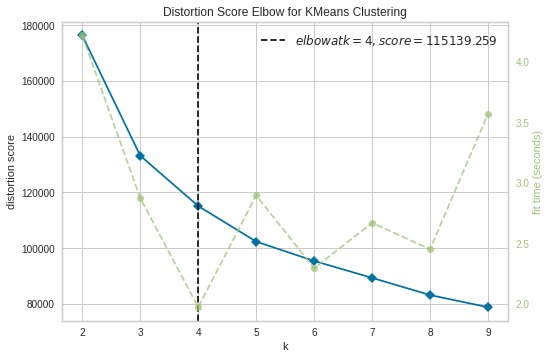

In [9]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10),
)

visualizer.fit(df_social)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [10]:
kmeans = KMeans(n_clusters=4)
df['PERFIL_SOCIOECON'] = kmeans.fit_predict(df_social)
df = pd.get_dummies(
    df,
    columns=['SG_UF_RESIDENCIA', 'PERFIL_SOCIOECON'],
    drop_first=True
)

In [11]:
pd.DataFrame(kmeans.cluster_centers_, columns=df_social.columns)

,Q001,Q002,Q006,Q024,Q047,TP_SEXO_M,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,...,TP_ESCOLA_2,TP_ESCOLA_3,IN_TREINEIRO_1,IN_BAIXA_VISAO_1,IN_SURDEZ_1,IN_SABATISTA_1,IN_GESTANTE_1,Q025_B,Q026_B,Q026_C
0,3.530478,3.822917,5.727623,1.119599,0.898534,0.420139,0.504630,0.090664,0.356481,0.021605,...,0.233796,0.097222,0.122299,0.001157,2.764716e-18,0.011188,0.000386,0.878086,0.195216,0.278549
1,4.809836,4.947541,12.213115,1.904918,2.344262,0.463934,0.660656,0.060656,0.221311,0.022951,...,0.070492,0.265574,0.218033,0.004918,9.215718e-19,0.003279,0.001639,0.973770,0.119672,0.129508
2,4.937437,4.161201,1.831988,0.570383,0.276488,0.398587,0.293138,0.141019,0.521948,0.022200,...,0.301211,0.026488,0.150353,0.000757,5.045409e-04,0.008325,0.000505,0.543138,0.264884,0.192735
3,1.427483,1.989336,1.721664,0.440890,0.094455,0.348416,0.261426,0.146709,0.543114,0.023461,...,0.284887,0.007617,0.112279,0.001219,4.570384e-04,0.010512,0.001371,0.425350,0.286411,0.219531


Estes dados preliminares imploram por mais atenção. Podemos identificar alguns perfis muito claros ao traçar os perfis socioeconômicos.

Lembrando que as questões são:
Q001 e Q002: Grau de estudo do homem/mulher responsável. 4 indica conclusão do ensino médio. 5 de uma graduação.

Q006: Renda mensal da família. 2 indica a faixa de R\\$ 880 a R\\$ 1320. 5 indica de R\\$ 2200 até R\\$ 2640 e 12 indica de R\\$7920 até R\\$8800.

Q024: O número de computadores na residência.

Q047: Tipo de escola em que estudou.

Q025: Ter acesso à internet em casa.

Q026: Se nunca trabalhou, já trabalhou ou está trabalhando.

Sobre a cor/raça:

1: Branco

2: Preto

3: Pardo

In [12]:
df.head()

,NU_IDADE,TP_ANO_CONCLUIU,IN_CEGUEIRA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,...,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,PERFIL_SOCIOECON_1,PERFIL_SOCIOECON_2,PERFIL_SOCIOECON_3
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,4,0,1,1,1,436.3,495.4,581.2,1,...,0,0,1,0,0,0,0,0,0,1
2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,0,0,1,1,1,474.5,544.1,599.0,1,...,0,0,0,0,0,0,0,0,0,1
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,21,0,0,0,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,25,9,0,0,0,0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,28,4,0,0,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0


In [13]:
target = 'NU_NOTA_MT'
X = df.drop(columns=target)
y = df[target]

In [14]:
params = {'fit_intercept': [False]}
regressor = GridSearchCV(LinearRegression(), params, verbose=3, cv=20, n_jobs=3)
regressor.fit(X, y)
best_reg = regressor.best_estimator_

print(regressor.best_score_)
y_pred = best_reg.predict(X)

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


0.9118584264003072


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    1.8s finished


In [15]:
pd.DataFrame({'NU_INSCRICAO': X.index, 'NU_NOTA_MT': y_pred})

,NU_INSCRICAO,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,480.622137
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,506.473212
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,-8.781650
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,3.747052
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,0.310322
...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,423.941339
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,455.988467
13727,5354503700ecf2388f68990435390b6e1ad454ee,503.472137
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,487.875460


## Aplicando nos dados de teste

In [16]:
test_data['PERFIL_SOCIOECON'] = kmeans.predict(test_social)


# Terminar de codificar os dados categóricos
test_data = pd.get_dummies(
    test_data,
    columns=['SG_UF_RESIDENCIA', 'PERFIL_SOCIOECON'],
    drop_first=True
)

X_test = test_data
y_pred = best_reg.predict(X_test)
answer = pd.DataFrame(data={'NU_NOTA_MT': y_pred}, index=X_test.index)
answer.loc[(answer['NU_NOTA_MT'] < 200), 'NU_NOTA_MT'] = 0

answer.to_csv('answer.csv')
